# Exercise 5

Resolve rate controller exercise, page 163


In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import matplotlib
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

import numpy as np
import matplotlib.pyplot as plt
import time

from two_link_robot import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Simulate the application of the constant Cartesian command v_c := (0.2 m/s, -0.3 m/s, -0.2 rad/s) for exactly 5 seconds. 
Calculate joint torques given constant commanded wrench w_c := (fx N, fy N, mz Nm)

<IPython.core.display.Javascript object>


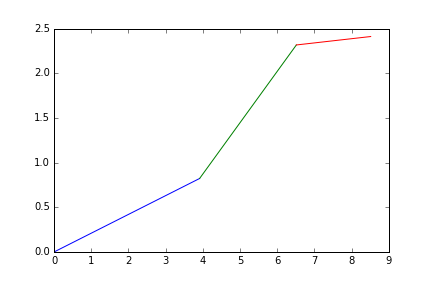

In [2]:
dt=0.1
sim_time=5.0
steps=int(np.round(sim_time/dt))

v_c = np.array([0.2, -0.3, -0.2])
w_c = np.array([1., 2., 3.])

robot = Robot()
visualise_robot = Visualise(robot)

fig = plt.figure(1)
ax = fig.add_subplot(111)
plt.ion()

visualise_robot.draw(ax)

fig.show()
fig.canvas.draw()

r_thetas  = np.empty(shape=(steps,3))
r_dthetas = np.empty(shape=(steps,3))
r_wrist   = np.empty(shape=(steps, 3))
r_det     = np.empty(shape=(steps,))
r_torques = np.empty(shape=(steps, 3))

for step in range(steps):
    thetas_c, dtheta_c = resolve_rate_controller(v_c, robot.jacobian, robot.thetas, dt)
    tau_c = np.dot(np.transpose(robot.jacobian), w_c)
    robot.command(thetas_c)
    robot.update()
    
    r_thetas[step, :]  = robot.thetas
    r_dthetas[step, :] = dtheta_c
    r_wrist[step, :]   = robot.get_wrist()
    r_det[step]        = np.linalg.det(robot.jacobian)
    r_torques[step, :] = tau_c
    
    ax.clear()
    visualise_robot.draw(ax)
    fig.canvas.draw()
    
    time.sleep(0.1)
    
        
    


<IPython.core.display.Javascript object>


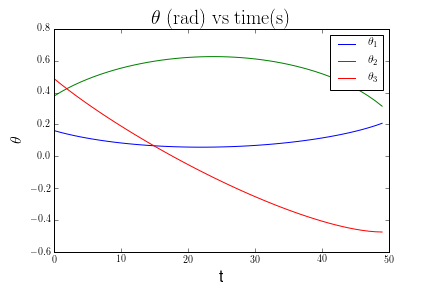

In [19]:
plt.figure()

plt.plot(r_thetas[:, 0])
plt.plot(r_thetas[:, 1])
plt.plot(r_thetas[:, 2])
plt.xlabel('t', fontsize=16)
plt.ylabel(r'\theta', fontsize=16)
plt.title(r'\theta \; \mathrm{(rad)\; vs\; time (s)}', fontsize=20)
plt.legend([r'\theta_1', r'\theta_2', r'\theta_3'])

plt.show()
 

<IPython.core.display.Javascript object>


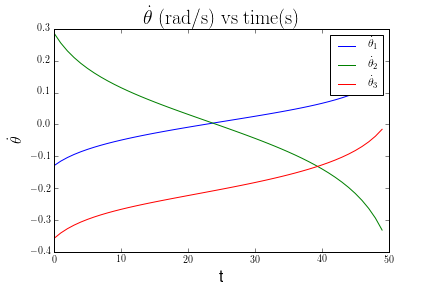

In [20]:
plt.figure()

plt.plot(r_dthetas[:, 0])
plt.plot(r_dthetas[:, 1])
plt.plot(r_dthetas[:, 2])
plt.xlabel('t', fontsize=16)
plt.ylabel(r'\dot{\theta}', fontsize=16)
plt.title(r'\dot{\theta} \; \mathrm{(rad/s)\; vs\; time (s)}', fontsize=20)
plt.legend([r'\dot{\theta}_1', r'\dot{\theta}_2', r'\dot{\theta}_3'])

plt.show()
 

<IPython.core.display.Javascript object>


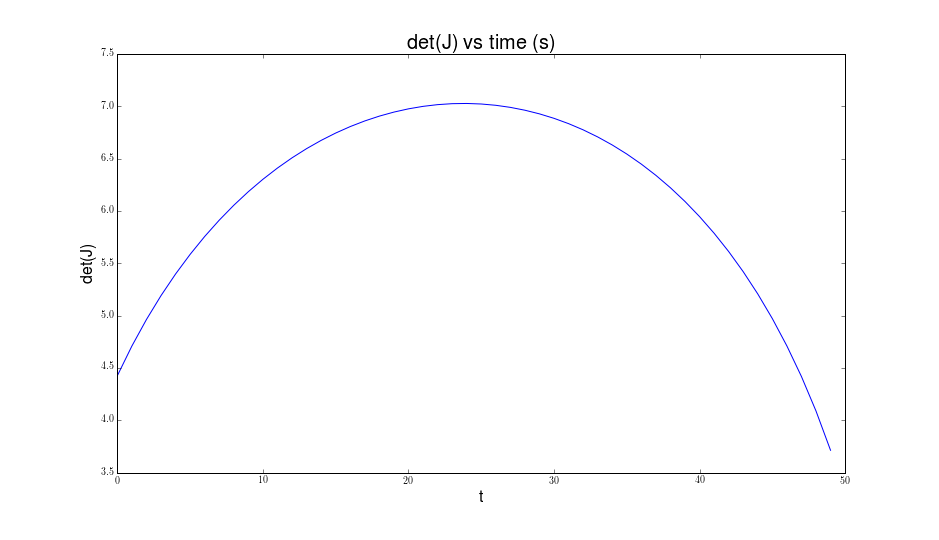

In [21]:
plt.figure()

plt.plot(r_det)
plt.xlabel('t', fontsize=16)
plt.ylabel('det(J)', fontsize=16)
plt.title('det(J) vs time (s)}', fontsize=20)
plt.show()